In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy.stats as stats
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn import preprocessing, svm
# from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv",nrows=2000)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
1995,Hyundai Accent Executive,2011,150000,60000,Petrol,Individual,Manual,First Owner
1996,Tata Manza Aura (ABS) Safire BS IV,2010,110000,77073,Petrol,Individual,Manual,Second Owner
1997,Ford Figo Aspire 1.5 TDCi Titanium,2016,400000,70000,Diesel,Individual,Manual,First Owner
1998,Hyundai i10 Magna LPG,2013,275000,90000,LPG,Individual,Manual,Second Owner


In [ ]:
df["selling_price"].value_counts()

250000     66
300000     59
350000     57
600000     55
450000     52
           ..
1330000     1
919999      1
611000      1
744000      1
284000      1
Name: selling_price, Length: 321, dtype: int64

# Handle missing value

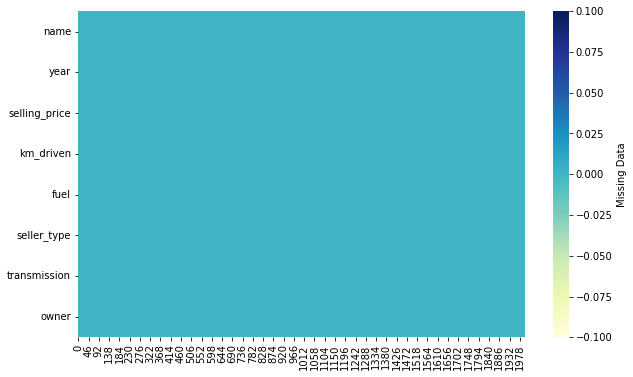

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

# add column

In [ ]:
car_age=2022-df.year

In [ ]:
df["car_age"]=car_age

In [ ]:
df.pop("year")
df.head(50)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,8
5,Maruti Alto LX BSIII,140000,125000,Petrol,Individual,Manual,First Owner,15
6,Hyundai Xcent 1.2 Kappa S,550000,25000,Petrol,Individual,Manual,First Owner,6
7,Tata Indigo Grand Petrol,240000,60000,Petrol,Individual,Manual,Second Owner,8
8,Hyundai Creta 1.6 VTVT S,850000,25000,Petrol,Individual,Manual,First Owner,7
9,Maruti Celerio Green VXI,365000,78000,CNG,Individual,Manual,First Owner,5


# catagorial data

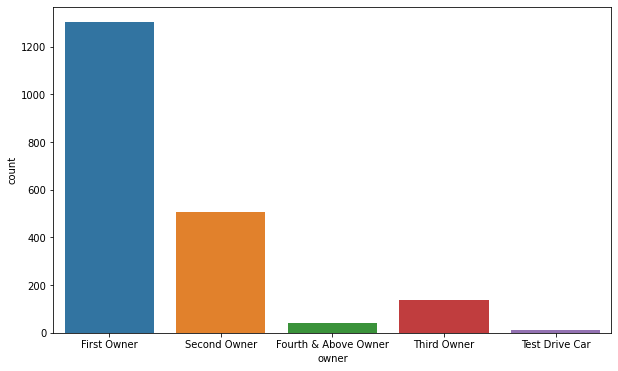

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x ='owner', data = df)

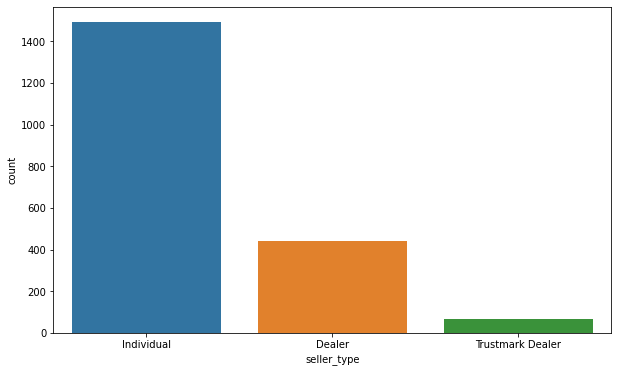

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x ='seller_type', data = df)

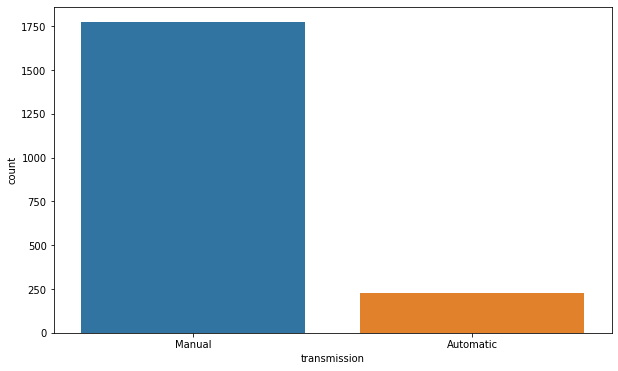

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x ='transmission', data = df)

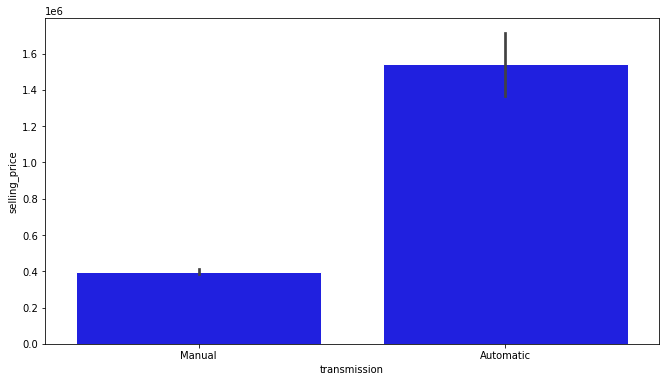

In [ ]:
plt.figure(figsize=(11,6))
sns.barplot(x = 'transmission', y = 'selling_price', data = df,
            label = 'Total', color = 'b', edgecolor = 'w')

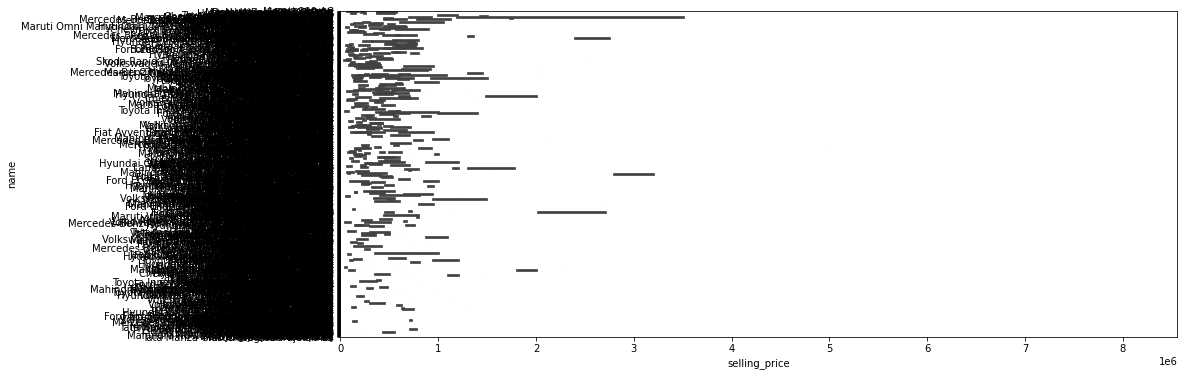

In [ ]:
# plt.figure(figsize=(15,6))
# sns.barplot(x = 'selling_price', y = 'name', data = df,
#             label = 'Total', color = 'b', edgecolor = 'w')

# Encoding catagorical variable

*owner column level encoding*

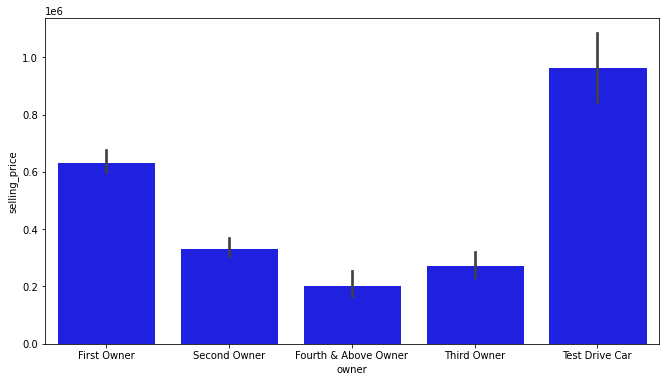

In [ ]:
plt.figure(figsize=(11,6))
sns.barplot(x = 'owner', y = 'selling_price', data = df,
            label = 'Total', color = 'b', edgecolor = 'w')

In [ ]:
data=df.owner

In [ ]:
levle_data={"Test Drive Car":5,"First Owner":4,"Second Owner":3,"Third Owner":2,"Fourth & Above Owner":1}
def level_encoding(data,levle_data):
  k=[]
  # df["level_diagnosis"]+k
  for x in range(len(data)):
    str_data=levle_data[data[x]]
    k.append(str_data)
  return k

level_encoding(data,levle_data)

[4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 1,
 3,
 2,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 1,
 2,
 4,
 4,
 3,
 3,
 3,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 2,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 4,
 1,
 3,
 4,
 3,
 3,
 4,
 3,
 2,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 2,
 2,
 3,
 3,
 2,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 4,
 1,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,


In [ ]:
df["owner_enco"]=level_encoding(data,levle_data)
df.pop("owner")

0        First Owner
1        First Owner
2        First Owner
3        First Owner
4       Second Owner
            ...     
1995     First Owner
1996    Second Owner
1997     First Owner
1998    Second Owner
1999     Third Owner
Name: owner, Length: 2000, dtype: object

*one hot encoding in transmission*

In [ ]:
pd.get_dummies(df.transmission)

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1995,0,1
1996,0,1
1997,0,1
1998,0,1


In [ ]:
df = pd.concat([df, pd.get_dummies(df.transmission)], axis=1)
df

,name,selling_price,km_driven,fuel,seller_type,transmission,car_age,owner_enco,Automatic,Manual
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,15,4,0,1
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,15,4,0,1
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,10,4,0,1
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,5,4,0,1
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,8,3,0,1
...,...,...,...,...,...,...,...,...,...,...
1995,Hyundai Accent Executive,150000,60000,Petrol,Individual,Manual,11,4,0,1
1996,Tata Manza Aura (ABS) Safire BS IV,110000,77073,Petrol,Individual,Manual,12,3,0,1
1997,Ford Figo Aspire 1.5 TDCi Titanium,400000,70000,Diesel,Individual,Manual,6,4,0,1
1998,Hyundai i10 Magna LPG,275000,90000,LPG,Individual,Manual,9,3,0,1


In [ ]:
df.pop("transmission")

0       Manual
1       Manual
2       Manual
3       Manual
4       Manual
         ...  
1995    Manual
1996    Manual
1997    Manual
1998    Manual
1999    Manual
Name: transmission, Length: 2000, dtype: object

one hot encoding in transmission seller_type

In [ ]:
seller_type=pd.get_dummies(df.seller_type)
pd.concat([df.seller_type,seller_type], axis=1).head(60)

,seller_type,Dealer,Individual,Trustmark Dealer
0,Individual,0,1,0
1,Individual,0,1,0
2,Individual,0,1,0
3,Individual,0,1,0
4,Individual,0,1,0
5,Individual,0,1,0
6,Individual,0,1,0
7,Individual,0,1,0
8,Individual,0,1,0
9,Individual,0,1,0


In [ ]:
df = pd.concat([df,seller_type], axis=1)
df

,name,selling_price,km_driven,fuel,seller_type,car_age,owner_enco,Automatic,Manual,Dealer,Individual,Trustmark Dealer
0,Maruti 800 AC,60000,70000,Petrol,Individual,15,4,0,1,0,1,0
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,15,4,0,1,0,1,0
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,10,4,0,1,0,1,0
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,5,4,0,1,0,1,0
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,8,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Hyundai Accent Executive,150000,60000,Petrol,Individual,11,4,0,1,0,1,0
1996,Tata Manza Aura (ABS) Safire BS IV,110000,77073,Petrol,Individual,12,3,0,1,0,1,0
1997,Ford Figo Aspire 1.5 TDCi Titanium,400000,70000,Diesel,Individual,6,4,0,1,0,1,0
1998,Hyundai i10 Magna LPG,275000,90000,LPG,Individual,9,3,0,1,0,1,0


In [ ]:
df.pop("seller_type")

0       Individual
1       Individual
2       Individual
3       Individual
4       Individual
           ...    
1995    Individual
1996    Individual
1997    Individual
1998    Individual
1999    Individual
Name: seller_type, Length: 2000, dtype: object

One hot encoding in fuel

In [ ]:
fuel=pd.get_dummies(df.fuel)
df = pd.concat([df, fuel], axis=1)
df

,name,selling_price,km_driven,fuel,car_age,owner_enco,Automatic,Manual,Dealer,Individual,Trustmark Dealer,CNG,Diesel,LPG,Petrol
0,Maruti 800 AC,60000,70000,Petrol,15,4,0,1,0,1,0,0,0,0,1
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,15,4,0,1,0,1,0,0,0,0,1
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,10,4,0,1,0,1,0,0,1,0,0
3,Datsun RediGO T Option,250000,46000,Petrol,5,4,0,1,0,1,0,0,0,0,1
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,8,3,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Hyundai Accent Executive,150000,60000,Petrol,11,4,0,1,0,1,0,0,0,0,1
1996,Tata Manza Aura (ABS) Safire BS IV,110000,77073,Petrol,12,3,0,1,0,1,0,0,0,0,1
1997,Ford Figo Aspire 1.5 TDCi Titanium,400000,70000,Diesel,6,4,0,1,0,1,0,0,1,0,0
1998,Hyundai i10 Magna LPG,275000,90000,LPG,9,3,0,1,0,1,0,0,0,1,0


In [ ]:
df.pop("fuel")

0       Petrol
1       Petrol
2       Diesel
3       Petrol
4       Diesel
         ...  
1995    Petrol
1996    Petrol
1997    Diesel
1998       LPG
1999    Diesel
Name: fuel, Length: 2000, dtype: object

In [ ]:
df

,name,selling_price,km_driven,car_age,owner_enco,Automatic,Manual,Dealer,Individual,Trustmark Dealer,CNG,Diesel,LPG,Petrol
0,Maruti 800 AC,60000,70000,15,4,0,1,0,1,0,0,0,0,1
1,Maruti Wagon R LXI Minor,135000,50000,15,4,0,1,0,1,0,0,0,0,1
2,Hyundai Verna 1.6 SX,600000,100000,10,4,0,1,0,1,0,0,1,0,0
3,Datsun RediGO T Option,250000,46000,5,4,0,1,0,1,0,0,0,0,1
4,Honda Amaze VX i-DTEC,450000,141000,8,3,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Hyundai Accent Executive,150000,60000,11,4,0,1,0,1,0,0,0,0,1
1996,Tata Manza Aura (ABS) Safire BS IV,110000,77073,12,3,0,1,0,1,0,0,0,0,1
1997,Ford Figo Aspire 1.5 TDCi Titanium,400000,70000,6,4,0,1,0,1,0,0,1,0,0
1998,Hyundai i10 Magna LPG,275000,90000,9,3,0,1,0,1,0,0,0,1,0


In [ ]:
# # df3=(df.shape[0]-50)
# # df[(df.shape[0]>df3)]
# df3=(df.selling_price.shape[0]) -50
# df3
# # df[(df.selling_price.shape[0]>df3)]
# df.index -50
# df[df.index-50 ]

# Train test split

In [ ]:
x=df.iloc[:,0:].drop(['selling_price',"name"], axis = 1)
y=df.iloc[:,1:2]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
y_train

,selling_price
195,190000
247,130000
795,300000
1962,300000
599,520000
...,...
727,211000
677,300000
1418,140000
1478,1825000


#Feature Selection Techniques

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
bestfeature=SelectKBest(score_func=chi2,k=10)
fit=bestfeature.fit(x,y)

In [ ]:
dfscore=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [ ]:
featureScore=pd.concat([dfcolumns,dfscore],axis=1)
featureScore.columns=["space","score"]

In [ ]:
featureScore

,space,score
0,km_driven,1.434888e+07
1,car_age,2.492299e+03
2,owner_enco,7.582347e+01
3,Automatic,9.596014e+02
4,Manual,1.222491e+02
5,Dealer,6.231069e+02
6,Individual,2.186397e+02
7,Trustmark Dealer,9.430237e+02
8,CNG,3.168689e+02
9,Diesel,3.418697e+02


In [ ]:
print(featureScore.nlargest(10,"score"))

               space         score
0          km_driven  1.434888e+07
1            car_age  2.492299e+03
3          Automatic  9.596014e+02
7   Trustmark Dealer  9.430237e+02
5             Dealer  6.231069e+02
9             Diesel  3.418697e+02
11            Petrol  3.311589e+02
8                CNG  3.168689e+02
6         Individual  2.186397e+02
10               LPG  1.430948e+02


# Feature Scaling

**Q-Q plot**

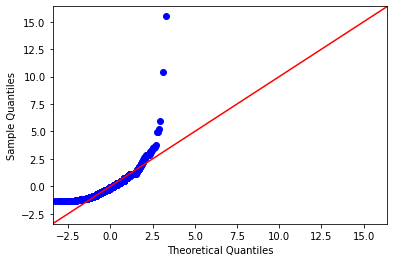

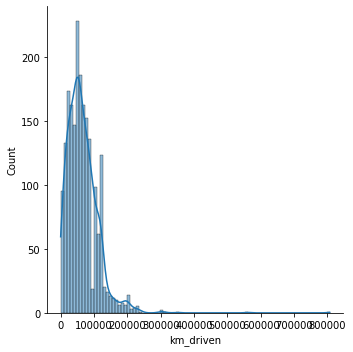

In [ ]:
data=df.km_driven
# def plot_data(df,feature):
#     plt.figure(figsize=(10,6))
#     plt.subplot(1,2,1)
#     df[feature].hist()
#     plt.subplot(1,2,2)
#     stats.probplot(df[feature],dist='norm',plot=pylab)
#     plt.show()
# plot_data(df,data)

sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(df.km_driven, kde=True)

*Standardization in Feature Scaling*

In [ ]:
def Standardization(data):
  Standardization_data=(data -data.mean())/data.std()
  return Standardization_data
Standardization(df.km_driven)

0       0.100021
1      -0.319690
2       0.729587
3      -0.403632
4       1.589994
          ...   
1995   -0.109835
1996    0.248451
1997    0.100021
1998    0.519731
1999    2.534343
Name: km_driven, Length: 2000, dtype: float64

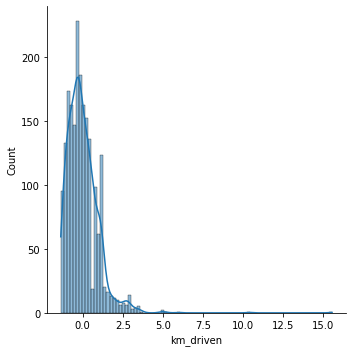

In [ ]:
sns.displot(Standardization(df.km_driven), kde=True)

*box cox transformation in km_driven column*


In [ ]:
x_train["km_driven"],parameters1=stats.boxcox(x_train.km_driven)

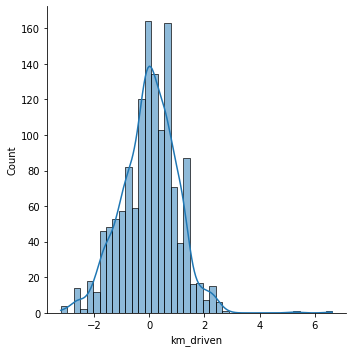

In [ ]:
data=x_train["km_driven"]
x_train["km_driven"]=Standardization(data)
sns.displot(Standardization(data), kde=True)

In [ ]:
x_test["km_driven"],parameters2=stats.boxcox(x_test.km_driven)

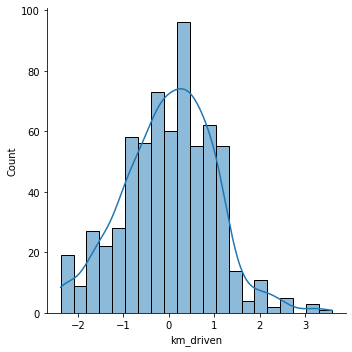

In [ ]:
data=x_test["km_driven"]
x_test["km_driven"]=Standardization(data)
sns.displot(Standardization(data), kde=True)

**Car age column feature scaling**

train

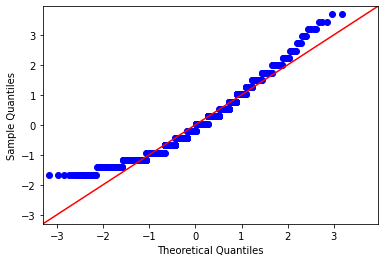

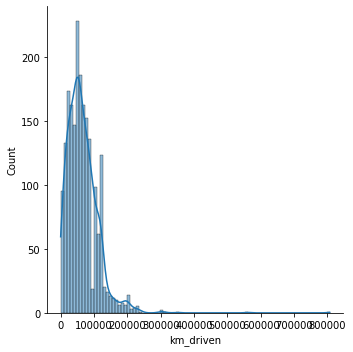

In [ ]:
data=x_train.car_age
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(df.km_driven, kde=True)

In [ ]:
x_train["car_age"],parameters1=stats.boxcox(x_train.car_age)

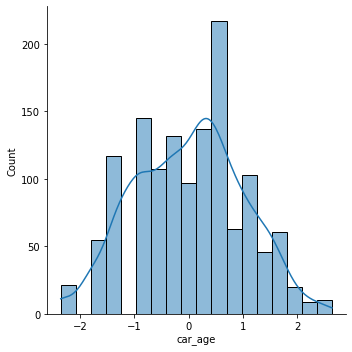

In [ ]:
#Standardization
data=x_train["car_age"]
x_train["car_age"]=Standardization(data)
sns.displot(Standardization(data), kde=True)

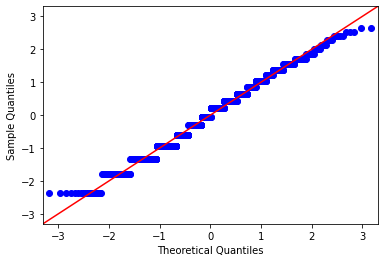

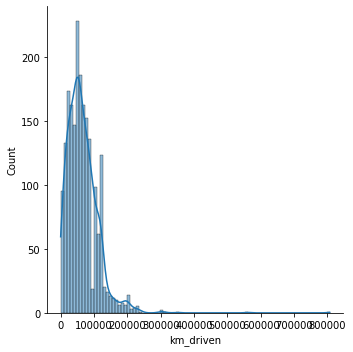

In [ ]:
#q q ploat
data=x_train["car_age"]
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(df.km_driven, kde=True)

test

In [ ]:
x_test["car_age"],parameters1=stats.boxcox(x_test.car_age)

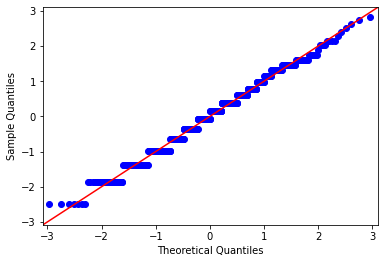

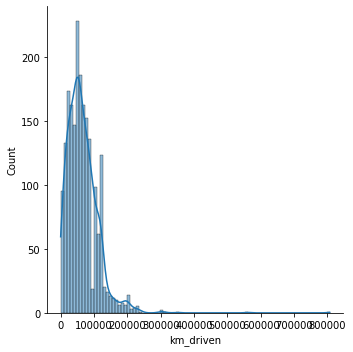

In [ ]:
data=x_test["car_age"]
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(df.km_driven, kde=True)

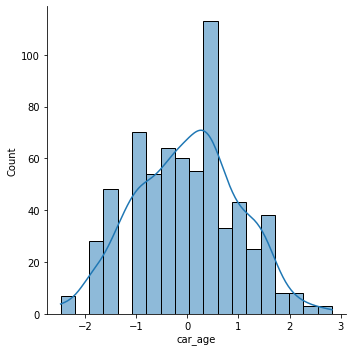

In [ ]:
#Standardization
data=x_test["car_age"]
x_test["car_age"]=Standardization(data)
sns.displot(Standardization(data), kde=True)

selling price column scaling

train

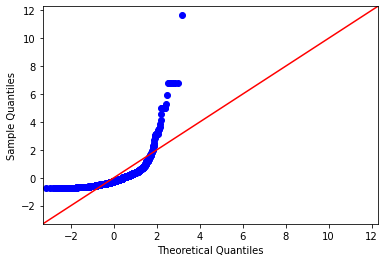

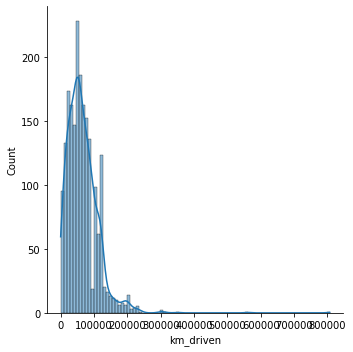

In [ ]:
#q q plot
data=y_train.selling_price
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(df.km_driven, kde=True)

In [ ]:
y_train["selling_price"],parameters1=stats.boxcox(y_train.selling_price)

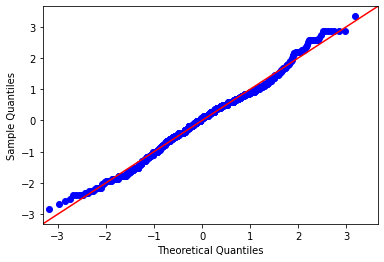

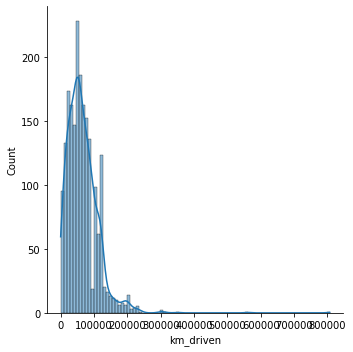

In [ ]:
data=y_train["selling_price"]
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(df.km_driven, kde=True)

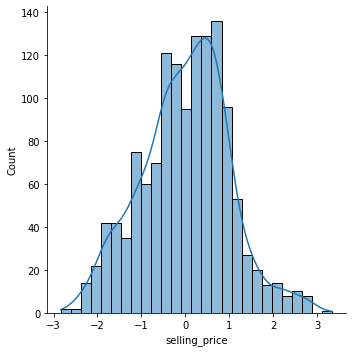

In [ ]:
#Standardization
data=y_train["selling_price"]
y_train["selling_price"]=Standardization(data)
sns.displot(Standardization(data), kde=True)

test

In [ ]:
y_test["selling_price"],parameters1=stats.boxcox(y_test.selling_price)

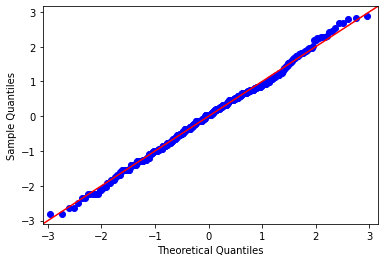

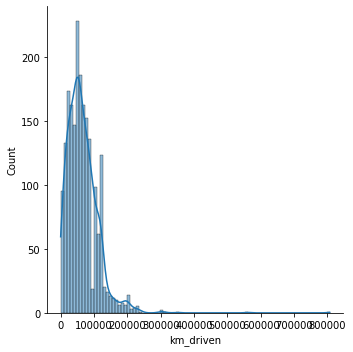

In [ ]:
data=y_test["selling_price"]
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(df.km_driven, kde=True)

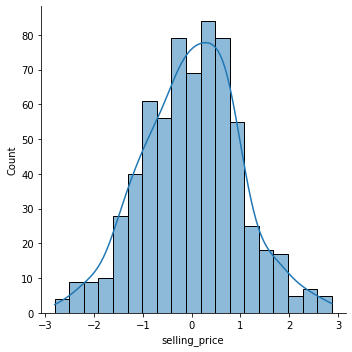

In [ ]:
#Standardization
data=y_test["selling_price"]
y_test["selling_price"]=Standardization(data)
sns.displot(Standardization(data), kde=True)

*owner_enco column*

train

In [ ]:
data=x_train["owner_enco"]
x_train["owner_enco"]=Standardization(data)

test

In [ ]:
data=x_test["owner_enco"]
x_test["owner_enco"]=Standardization(data)

In [ ]:
x_train

,km_driven,car_age,owner_enco,Automatic,Manual,Dealer,Individual,Trustmark Dealer,CNG,Diesel,LPG,Petrol
195,0.736926,0.642882,-2.205903,0,1,0,1,0,0,1,0,0
247,0.547253,0.642882,-0.801003,0,1,0,1,0,0,1,0,0
795,-0.903528,0.201644,-0.801003,0,1,0,1,0,0,1,0,0
1962,0.001822,1.031732,-0.801003,0,1,0,1,0,0,1,0,0
599,-1.610694,-0.943492,0.603897,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
727,-0.253388,0.842904,-0.801003,0,1,1,0,0,0,0,0,1
677,-1.350673,1.031732,0.603897,0,1,0,1,0,0,0,0,1
1418,0.914607,1.381223,-0.801003,0,1,0,1,0,0,0,0,1
1478,-1.404141,-1.782562,0.603897,0,1,1,0,0,0,1,0,0


In [ ]:
x_test

,km_driven,car_age,owner_enco,Automatic,Manual,Dealer,Individual,Trustmark Dealer,CNG,Diesel,LPG,Petrol
387,-0.458253,-0.654149,0.650399,0,1,0,1,0,0,0,0,1
239,0.779416,0.383852,-0.716682,0,1,0,1,0,0,1,0,0
1636,-0.598814,-0.993222,0.650399,0,1,0,1,0,0,0,0,1
1136,1.094429,0.383852,-2.083762,0,1,0,1,0,0,1,0,0
125,0.940786,1.309124,-3.450843,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1828,0.591511,0.383852,-0.716682,0,1,0,1,0,0,1,0,0
1569,0.025669,0.592868,-0.716682,0,1,0,1,0,0,1,0,0
286,-0.227347,0.383852,-0.716682,0,1,0,1,0,0,0,0,1
1656,0.453630,1.309124,0.650399,0,1,0,1,0,0,0,0,1


In [ ]:
l=x_test.to_numpy()
l

array([[-0.45825302, -0.65414879,  0.6503989 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.77941592,  0.38385238, -0.7166816 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.59881405, -0.99322217,  0.6503989 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.22734657,  0.38385238, -0.7166816 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.45362963,  1.30912388,  0.6503989 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.02566903,  0.15860498,  0.6503989 , ...,  1.        ,
         0.        ,  0.        ]])

#Multivariable_Linear_Regression

In [ ]:
# %run Multivariable_Linear_Regression.ipynb

In [ ]:
class Multivariate_Lr:
    def __init__(self,n):
        #initialising weights and bias
        self.w = np.random.randn(1,n)
        self.b = 0
    def pred(self,X):
        y_pred = np.matmul(X, self.w.T)+self.b #(m,n)x(n,1)=(m,1)
        return y_pred
    def Loss(self,y_pred,y):
        m = y.shape[0]
        loss = ((y_pred - y)**2)/(2*m)
        return np.sum(loss)
    def grad(self,X,y):
        m = y.shape[0]
        y_hat = self.pred(X)
        dw = np.matmul((y_hat - y).T , X)*(1/m) #(1,n)
        db = np.sum(y_hat - y)*(1/m) #scalar value
        return dw, db
    def fit(self,X,y,epochs,lr):
        self.w_hist = self.w
        self.b_hist = [self.b]
        Loss = []
        #Storing the initial loss before starting the training
        y_pred = self.pred(X)
        initial_loss = self.Loss(y_pred,y)
        Loss.append(initial_loss)
        for i in range(1,epochs+1):
            dw,db = self.grad(X,y)
            self.w = self.w - lr*dw
            self.b = self.b - lr*db
            y_pred = self.pred(X)
            loss = self.Loss(y_pred, y)
            Loss.append(loss)
            #Storing the updated values of w,b
            self.w_hist = np.append(self.w_hist, self.w, axis = 0)
            self.b_hist.append(self.b)
            #print('Epoch: ',i,'Training Loss: ',loss)
        print('Final Loss: ',loss)
        plt.plot(Loss,'-o')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

In [ ]:
x_train=x_train.to_numpy()

NameError: ignored

In [ ]:
y_train=y_train.to_numpy()

In [ ]:
obj=Multivariate_Lr(x_train.shape[1])
# obj.w
# Y_pred=obj.pred(x)
# # obj.Loss(Y_pred,y)
# obj.Loss(Y_pred,y)
# obj.grad(x,y)
# obj.fit(x_train,y_train,500,0.01)

Final Loss:  0.1441205105250591


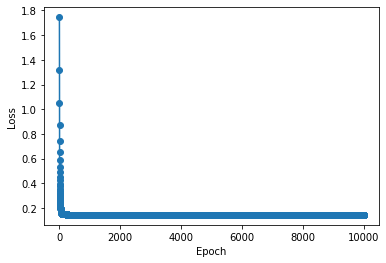

In [ ]:
obj.fit(x_train,y_train,10000,0.1)

In [ ]:
obj.w

array([[ 0.01456694, -0.57014793,  0.03103365, -0.13337021, -1.02241076,
         1.02913712,  0.80751489,  1.36933822, -0.28565511,  0.41801946,
        -0.25929769, -0.20545081]])

In [ ]:
Y_pred=obj.pred(x_train)
Y_pred

array([[-0.28415799],
       [-0.24332176],
       [-0.01288402],
       ...,
       [-1.28240419],
       [ 1.37633592],
       [-1.28775543]])

In [ ]:
obj.Loss(Y_pred,y_train)

0.1441205105250591

In [ ]:
obj.grad(x_train,y_train)

(array([[-1.69158687e-08,  2.03680209e-08,  8.44291785e-10,
         -2.08009772e-08, -2.90784778e-08, -3.14760414e-08,
         -4.72299133e-09, -1.36804223e-08,  1.65404365e-06,
          9.79899261e-08, -1.88500154e-06,  8.30885162e-08]]),
 -4.987945507109832e-08)

In [ ]:
# regr = LinearRegression()
# regr.fit(x_train, y_train)
# print(regr.score(x_test, y_test))

In [ ]:
#-0.600161 	-0.074121 	0.623992 	0 	1 	0 	1 	0 	0 	0 	0 	1

#km_driven 	car_age 	owner_enco 	Automatic 	Manual 	Dealer 	Individual 	Trustmark Dealer 	CNG 	Diesel 	LPG 	Petrol

In [ ]:
def prediction(obj):
    l=[]
    l.append(float(input('Enter km_driven ')))
    l.append(float(input('car_age: ')))
    l.append(float(input('Automatic: ')))
    l.append(float(input('Manual: ')))
    l.append(float(input('Dealer: ')))
    l.append(float(input('Individual: ')))
    l.append(float(input('Trustmark: ')))
    l.append(float(input('Dealer: ')))
    l.append(float(input('CNG: ')))
    l.append(float(input('Diesel: ')))
    l.append(float(input('LPG: ')))
    l.append(float(input('Petrol: ')))
    arr = np.asarray([l])
    scaled_arr = sc.transform(arr)
    print('Price of the house per unit area: ', 0bj.pred(scaled_arr)[0][0])

In [ ]:
prediction(obj)

NameError: ignored